##### NAME:- SOMYA RANJAN SAHOO

# Microsoft Stock Price Prediction

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load stock price data (replace 'YOUR_DATA.csv' with the actual file path)
data = pd.read_csv('C:/Users/Soumya/Desktop/Data Science/Bharat Intern/Microsoft Stock Prices.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
# Extract the 'Close' prices for prediction
df = data[['Close']].copy()

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [6]:
# Create a function to prepare the data for the LSTM model
def create_dataset(dataset, time_steps=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        data_X.append(a)
        data_Y.append(dataset[i + time_steps, 0])
    return np.array(data_X), np.array(data_Y)

In [7]:
# Set the time steps and split the data into training and testing sets
time_steps = 60
X, Y = create_dataset(df.values, time_steps)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
# Reshape the input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
37/37 [==============================] - 21s 113ms/step - loss: 0.0243
Epoch 2/10
37/37 [==============================] - 4s 112ms/step - loss: 7.9814e-04
Epoch 3/10
37/37 [==============================] - 4s 98ms/step - loss: 6.5285e-04
Epoch 4/10
37/37 [==============================] - 4s 102ms/step - loss: 6.8128e-04
Epoch 5/10
37/37 [==============================] - 4s 108ms/step - loss: 6.7544e-04
Epoch 6/10
37/37 [==============================] - 5s 124ms/step - loss: 6.5804e-04
Epoch 7/10
37/37 [==============================] - 4s 100ms/step - loss: 6.6382e-04
Epoch 8/10
37/37 [==============================] - 4s 96ms/step - loss: 7.7484e-04
Epoch 9/10
37/37 [==============================] - 4s 101ms/step - loss: 6.9668e-04
Epoch 10/10
37/37 [==============================] - 4s 104ms/step - loss: 6.7864e-04


In [12]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

10/10 [==============================] - 0s 42ms/step


In [13]:
# Invert the normalization for better understanding
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [14]:
# Calculate RMSE
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print(f'Train RMSE: {train_score}')

test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print(f'Test RMSE: {test_score}')

Train RMSE: 5.120726135430327
Test RMSE: 4.767009436046949


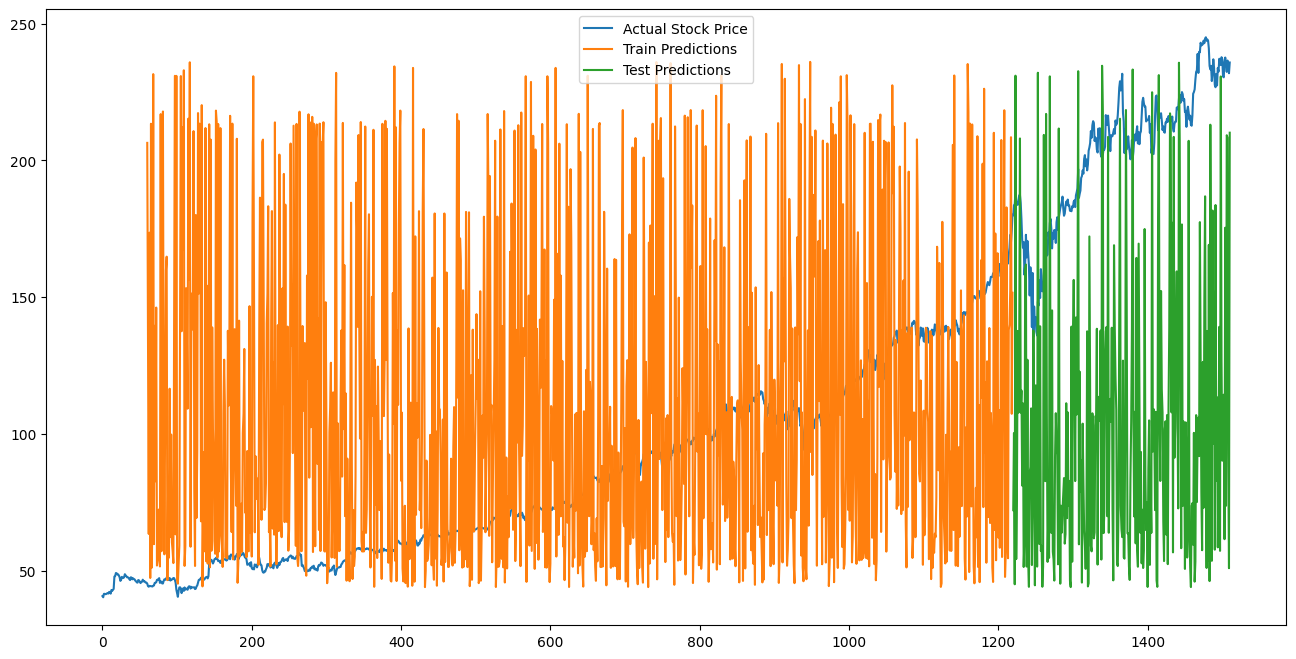

In [15]:
# Visualize the results
plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Actual Stock Price')
plt.plot(np.arange(time_steps, len(train_predict) + time_steps), train_predict[:, 0], label='Train Predictions')
plt.plot(np.arange(len(train_predict) + time_steps, len(train_predict) + len(test_predict) + time_steps), test_predict[:, 0], label='Test Predictions')
plt.legend()
plt.show()